In [65]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import beta, gamma

C:\Users\Alicia BASSIERE\AppData\Local\Temp\ipykernel_20120\3298033280.py:27: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(electricity_data, kde=True, label='Histogram (Normalized)', color='blue', norm_hist=True)
C:\Users\Alicia BASSIERE\AppData\Local\Temp\ipykernel_20120\3298033280.py:28: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r-" (-> color='r'). The keyword argument will take precedence.
  plt.plot(x, pdf_beta, 'r-', lw=2, label='Beta Fit', color='red')


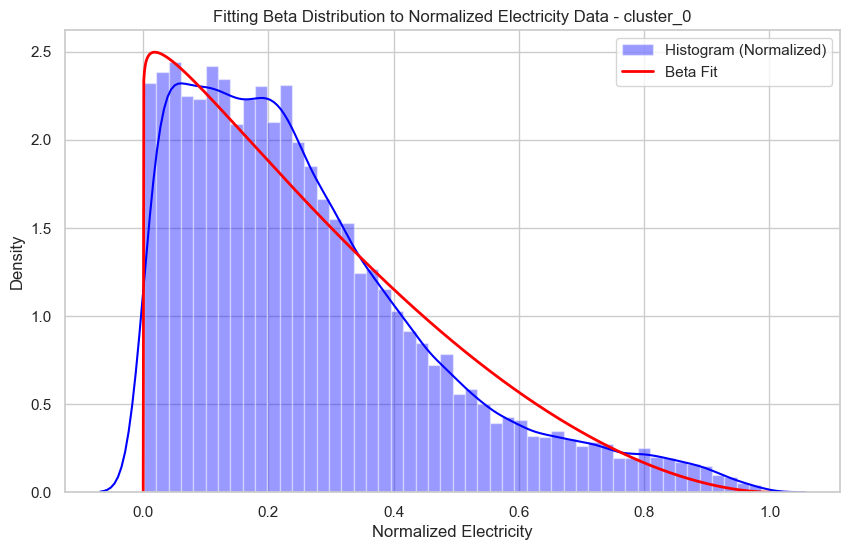

Beta Distribution Parameters:
Alpha: 1.0334011157234966
Beta: 2.7816669985770073
Location: 0
Scale: 1


In [70]:
path = r'C:\Users\Alicia BASSIERE\OneDrive - GENES\Documents\Paper 01 - DIPU\Estimation\wind\clusterOnshore'

cluster_0 = pd.read_csv(path + r"\cluster_0.csv")

# Convert the timestamp to a date format
cluster_0['date'] = pd.to_datetime(cluster_0['Unnamed: 0'])

# Extract the "electricity" column
electricity_data = cluster_0['electricity']

# Reshape the data for fitting
electricity_data = electricity_data[(electricity_data > 0) & (electricity_data < 1)]

# Provide initial parameter guesses
initial_alpha = 1
initial_beta = 1

# Fit a Beta distribution to the normalized data with initial guesses
alpha, beta_params, loc, scale = beta.fit(electricity_data, floc=0, fscale=1, loc=initial_alpha, scale=initial_beta)

# Generate values for the Beta distribution
x = np.linspace(0, 1, 1000)
pdf_beta = beta.pdf(x, alpha, beta_params, loc, scale)

# Plot the histogram of the data and the fitted Beta distribution
plt.figure(figsize=(10, 6))
sns.distplot(electricity_data, kde=True, label='Histogram (Normalized)', color='blue', norm_hist=True)
plt.plot(x, pdf_beta, 'r-', lw=2, label='Beta Fit', color='red')
plt.title('Fitting Beta Distribution to Normalized Electricity Data - cluster_0')
plt.xlabel('Normalized Electricity')
plt.ylabel('Density')
plt.legend()
plt.show()

# Print the parameters of the fitted Beta distribution
print("Beta Distribution Parameters:")
print("Alpha:", alpha)
print("Beta:", beta_params)
print("Location:", loc)
print("Scale:", scale)

C:\Users\Alicia BASSIERE\AppData\Local\Temp\ipykernel_20120\397288921.py:37: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(electricity_data, kde=True, label='Histogram (Normalized)', color='blue', norm_hist=True)
C:\Users\Alicia BASSIERE\AppData\Local\Temp\ipykernel_20120\397288921.py:38: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r-" (-> color='r'). The keyword argument will take precedence.
  plt.plot(x, pdf_beta, 'r-', lw=2, label='Beta Fit', color='red')


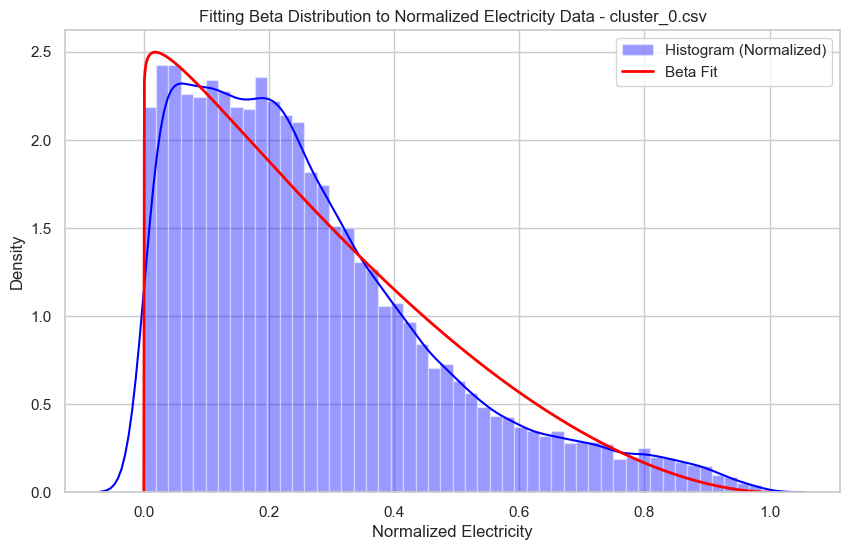

C:\Users\Alicia BASSIERE\AppData\Local\Temp\ipykernel_20120\397288921.py:37: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(electricity_data, kde=True, label='Histogram (Normalized)', color='blue', norm_hist=True)
C:\Users\Alicia BASSIERE\AppData\Local\Temp\ipykernel_20120\397288921.py:38: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r-" (-> color='r'). The keyword argument will take precedence.
  plt.plot(x, pdf_beta, 'r-', lw=2, label='Beta Fit', color='red')


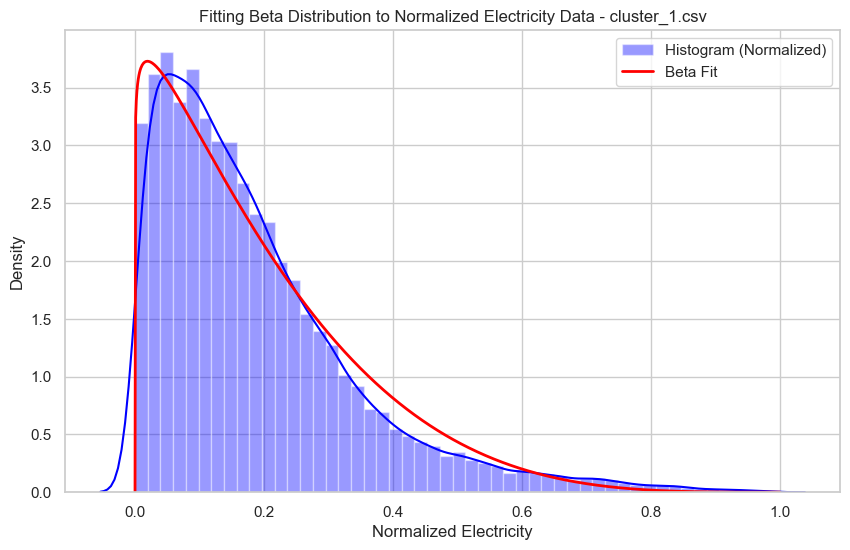

C:\Users\Alicia BASSIERE\AppData\Local\Temp\ipykernel_20120\397288921.py:37: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(electricity_data, kde=True, label='Histogram (Normalized)', color='blue', norm_hist=True)
C:\Users\Alicia BASSIERE\AppData\Local\Temp\ipykernel_20120\397288921.py:38: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r-" (-> color='r'). The keyword argument will take precedence.
  plt.plot(x, pdf_beta, 'r-', lw=2, label='Beta Fit', color='red')


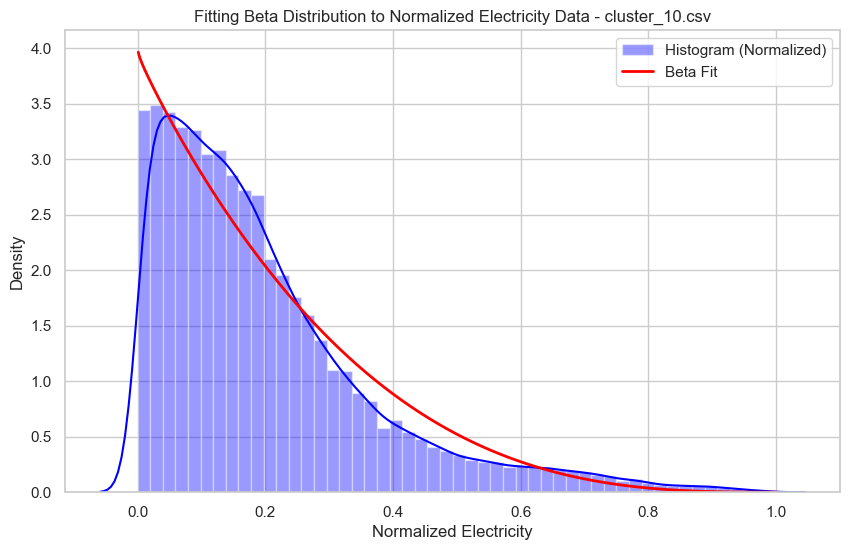

C:\Users\Alicia BASSIERE\AppData\Local\Temp\ipykernel_20120\397288921.py:37: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(electricity_data, kde=True, label='Histogram (Normalized)', color='blue', norm_hist=True)
C:\Users\Alicia BASSIERE\AppData\Local\Temp\ipykernel_20120\397288921.py:38: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r-" (-> color='r'). The keyword argument will take precedence.
  plt.plot(x, pdf_beta, 'r-', lw=2, label='Beta Fit', color='red')


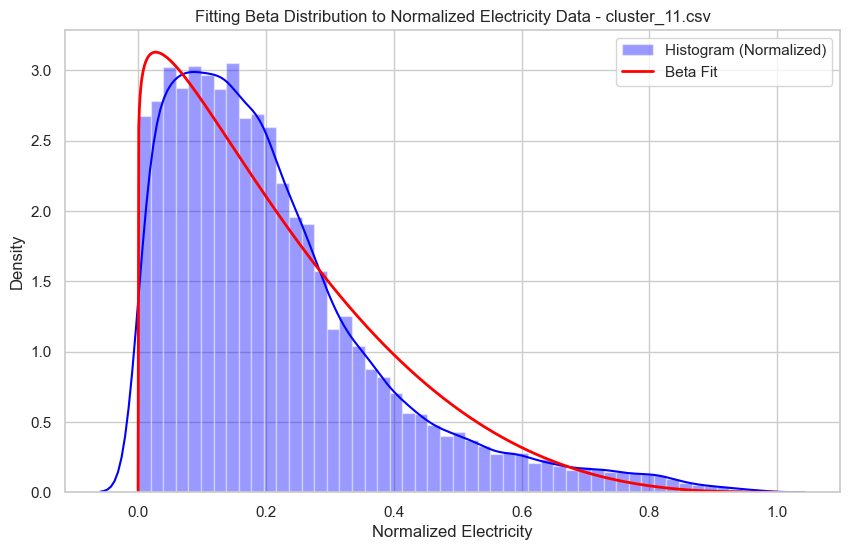

C:\Users\Alicia BASSIERE\AppData\Local\Temp\ipykernel_20120\397288921.py:37: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(electricity_data, kde=True, label='Histogram (Normalized)', color='blue', norm_hist=True)
C:\Users\Alicia BASSIERE\AppData\Local\Temp\ipykernel_20120\397288921.py:38: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r-" (-> color='r'). The keyword argument will take precedence.
  plt.plot(x, pdf_beta, 'r-', lw=2, label='Beta Fit', color='red')


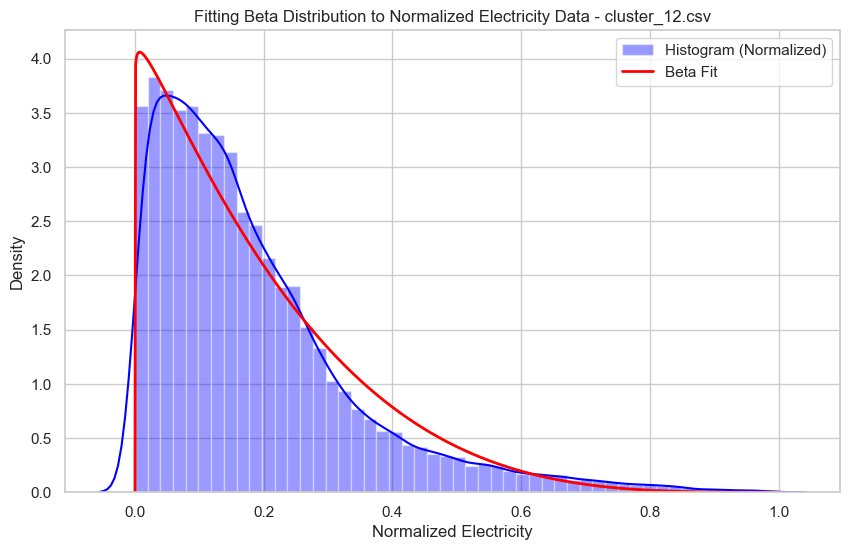

C:\Users\Alicia BASSIERE\AppData\Local\Temp\ipykernel_20120\397288921.py:37: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(electricity_data, kde=True, label='Histogram (Normalized)', color='blue', norm_hist=True)
C:\Users\Alicia BASSIERE\AppData\Local\Temp\ipykernel_20120\397288921.py:38: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r-" (-> color='r'). The keyword argument will take precedence.
  plt.plot(x, pdf_beta, 'r-', lw=2, label='Beta Fit', color='red')


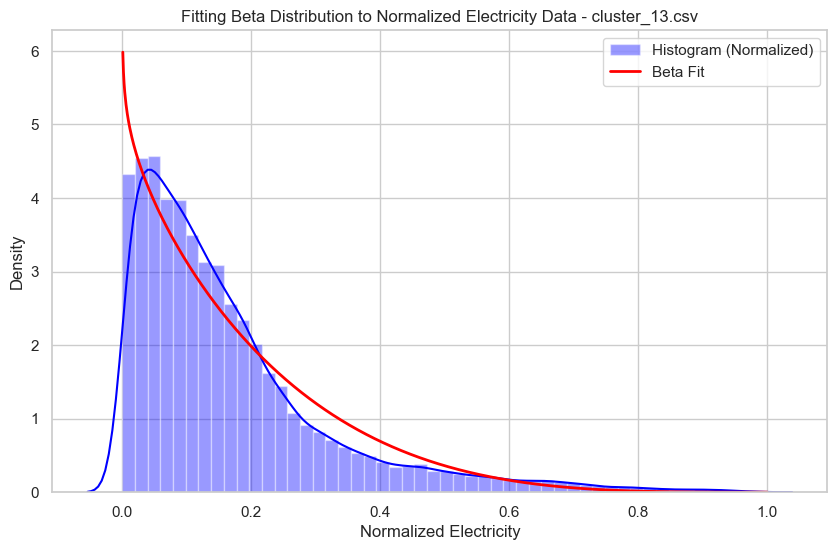

C:\Users\Alicia BASSIERE\AppData\Local\Temp\ipykernel_20120\397288921.py:37: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(electricity_data, kde=True, label='Histogram (Normalized)', color='blue', norm_hist=True)
C:\Users\Alicia BASSIERE\AppData\Local\Temp\ipykernel_20120\397288921.py:38: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r-" (-> color='r'). The keyword argument will take precedence.
  plt.plot(x, pdf_beta, 'r-', lw=2, label='Beta Fit', color='red')


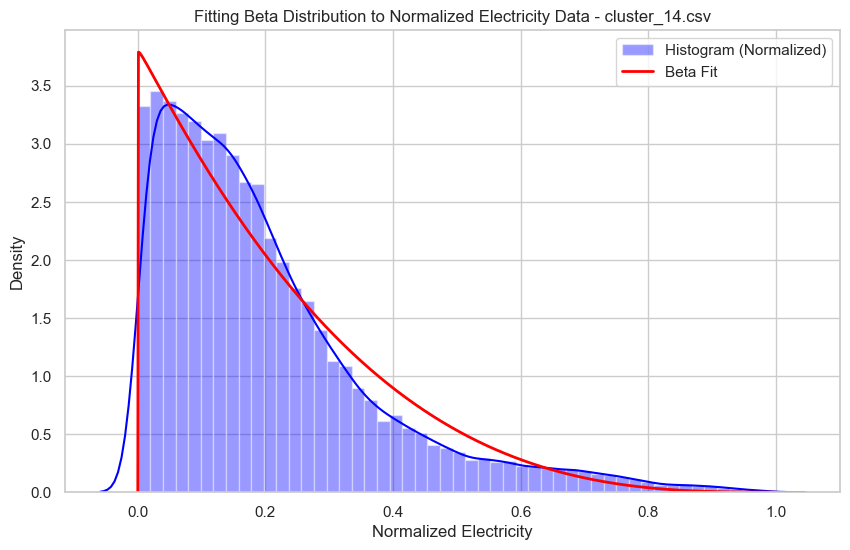

C:\Users\Alicia BASSIERE\AppData\Local\Temp\ipykernel_20120\397288921.py:37: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(electricity_data, kde=True, label='Histogram (Normalized)', color='blue', norm_hist=True)
C:\Users\Alicia BASSIERE\AppData\Local\Temp\ipykernel_20120\397288921.py:38: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r-" (-> color='r'). The keyword argument will take precedence.
  plt.plot(x, pdf_beta, 'r-', lw=2, label='Beta Fit', color='red')


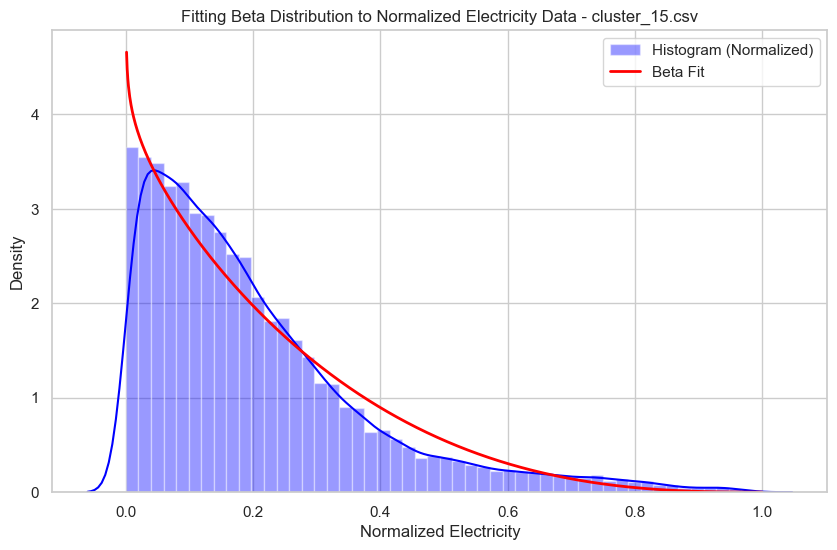

C:\Users\Alicia BASSIERE\AppData\Local\Temp\ipykernel_20120\397288921.py:37: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(electricity_data, kde=True, label='Histogram (Normalized)', color='blue', norm_hist=True)
C:\Users\Alicia BASSIERE\AppData\Local\Temp\ipykernel_20120\397288921.py:38: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r-" (-> color='r'). The keyword argument will take precedence.
  plt.plot(x, pdf_beta, 'r-', lw=2, label='Beta Fit', color='red')


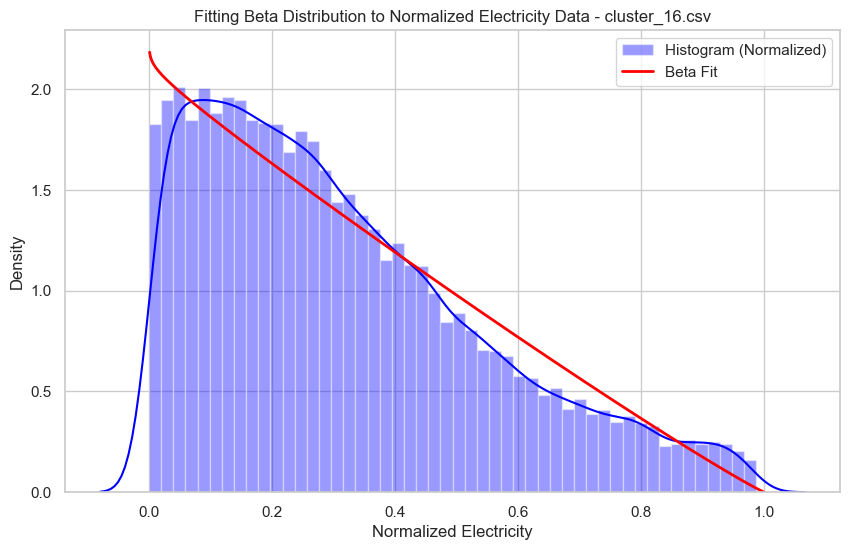

C:\Users\Alicia BASSIERE\AppData\Local\Temp\ipykernel_20120\397288921.py:37: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(electricity_data, kde=True, label='Histogram (Normalized)', color='blue', norm_hist=True)
C:\Users\Alicia BASSIERE\AppData\Local\Temp\ipykernel_20120\397288921.py:38: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r-" (-> color='r'). The keyword argument will take precedence.
  plt.plot(x, pdf_beta, 'r-', lw=2, label='Beta Fit', color='red')


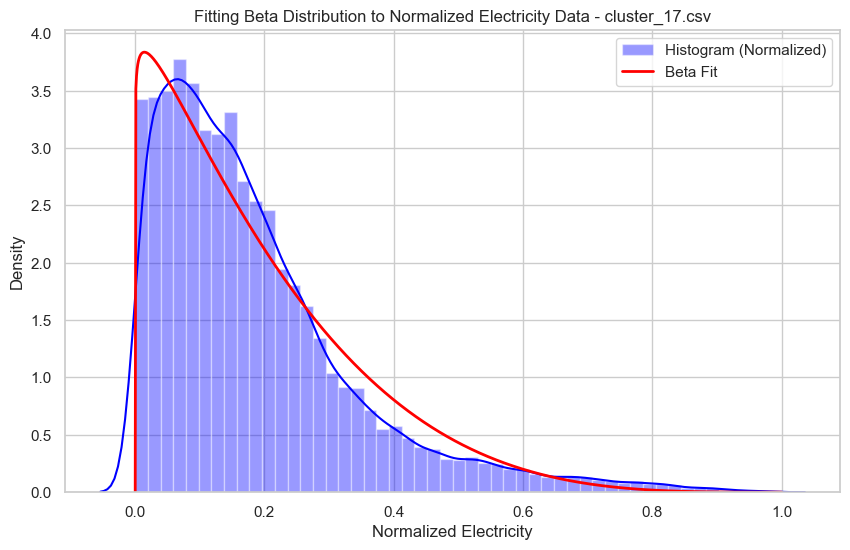

C:\Users\Alicia BASSIERE\AppData\Local\Temp\ipykernel_20120\397288921.py:37: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(electricity_data, kde=True, label='Histogram (Normalized)', color='blue', norm_hist=True)
C:\Users\Alicia BASSIERE\AppData\Local\Temp\ipykernel_20120\397288921.py:38: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r-" (-> color='r'). The keyword argument will take precedence.
  plt.plot(x, pdf_beta, 'r-', lw=2, label='Beta Fit', color='red')


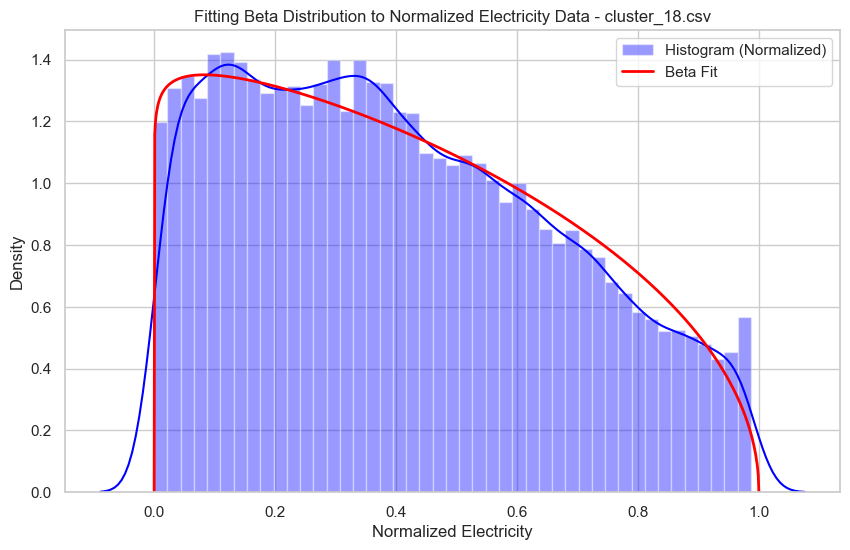

C:\Users\Alicia BASSIERE\AppData\Local\Temp\ipykernel_20120\397288921.py:37: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(electricity_data, kde=True, label='Histogram (Normalized)', color='blue', norm_hist=True)
C:\Users\Alicia BASSIERE\AppData\Local\Temp\ipykernel_20120\397288921.py:38: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r-" (-> color='r'). The keyword argument will take precedence.
  plt.plot(x, pdf_beta, 'r-', lw=2, label='Beta Fit', color='red')


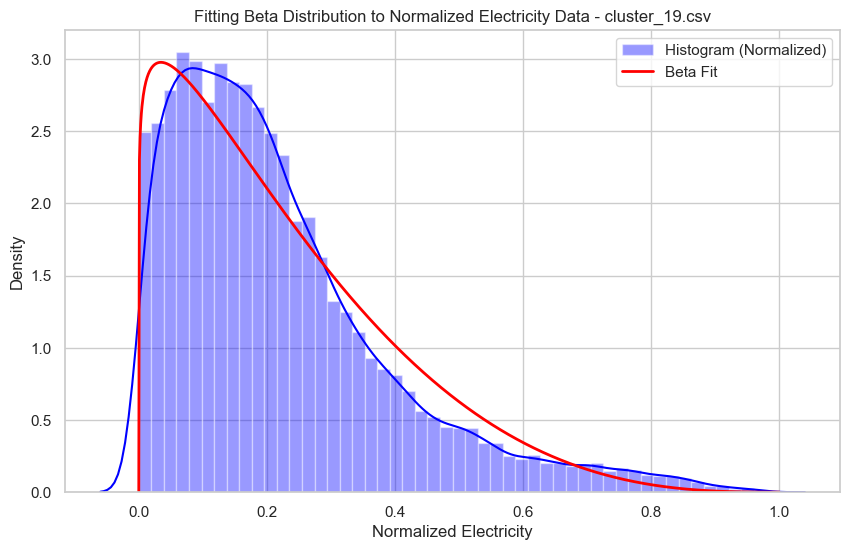

C:\Users\Alicia BASSIERE\AppData\Local\Temp\ipykernel_20120\397288921.py:37: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(electricity_data, kde=True, label='Histogram (Normalized)', color='blue', norm_hist=True)
C:\Users\Alicia BASSIERE\AppData\Local\Temp\ipykernel_20120\397288921.py:38: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r-" (-> color='r'). The keyword argument will take precedence.
  plt.plot(x, pdf_beta, 'r-', lw=2, label='Beta Fit', color='red')


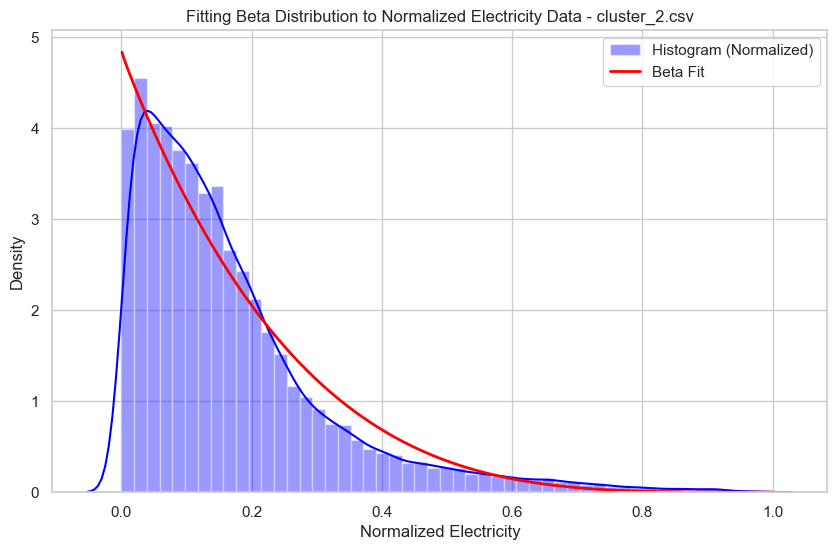

C:\Users\Alicia BASSIERE\AppData\Local\Temp\ipykernel_20120\397288921.py:37: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(electricity_data, kde=True, label='Histogram (Normalized)', color='blue', norm_hist=True)
C:\Users\Alicia BASSIERE\AppData\Local\Temp\ipykernel_20120\397288921.py:38: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r-" (-> color='r'). The keyword argument will take precedence.
  plt.plot(x, pdf_beta, 'r-', lw=2, label='Beta Fit', color='red')


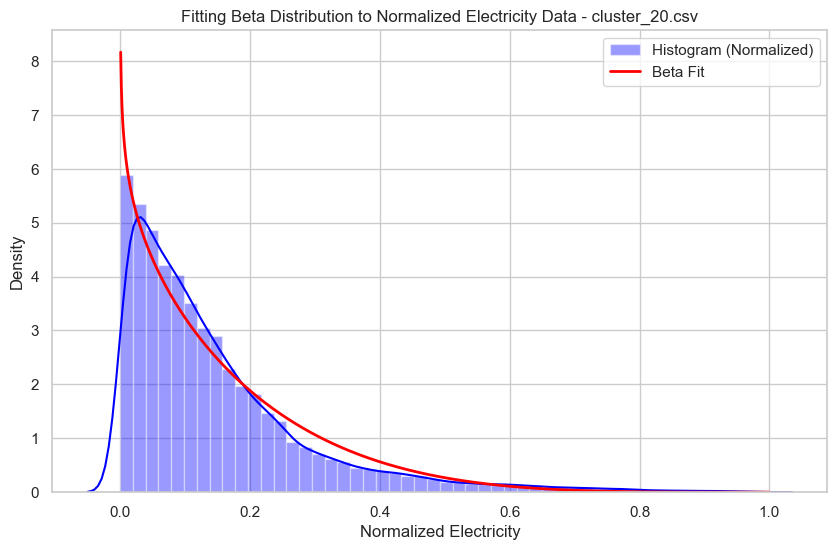

C:\Users\Alicia BASSIERE\AppData\Local\Temp\ipykernel_20120\397288921.py:37: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(electricity_data, kde=True, label='Histogram (Normalized)', color='blue', norm_hist=True)
C:\Users\Alicia BASSIERE\AppData\Local\Temp\ipykernel_20120\397288921.py:38: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r-" (-> color='r'). The keyword argument will take precedence.
  plt.plot(x, pdf_beta, 'r-', lw=2, label='Beta Fit', color='red')


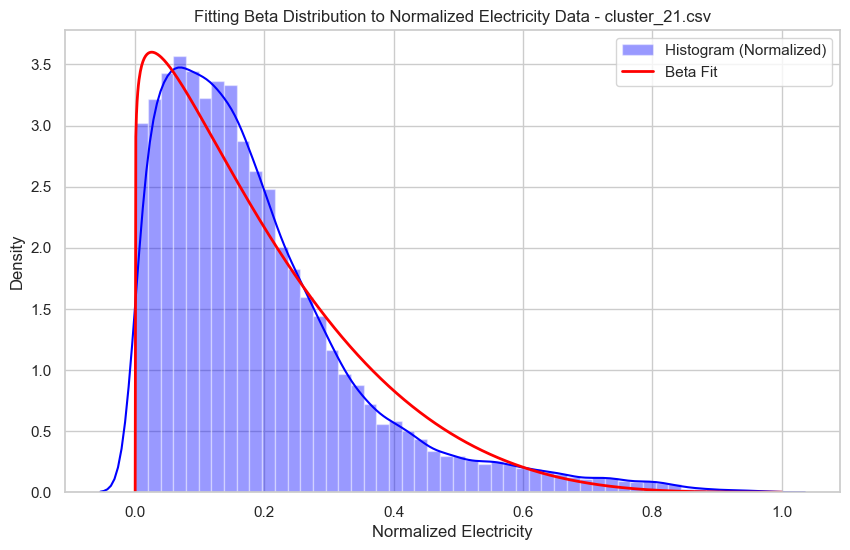

C:\Users\Alicia BASSIERE\AppData\Local\Temp\ipykernel_20120\397288921.py:37: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(electricity_data, kde=True, label='Histogram (Normalized)', color='blue', norm_hist=True)
C:\Users\Alicia BASSIERE\AppData\Local\Temp\ipykernel_20120\397288921.py:38: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r-" (-> color='r'). The keyword argument will take precedence.
  plt.plot(x, pdf_beta, 'r-', lw=2, label='Beta Fit', color='red')


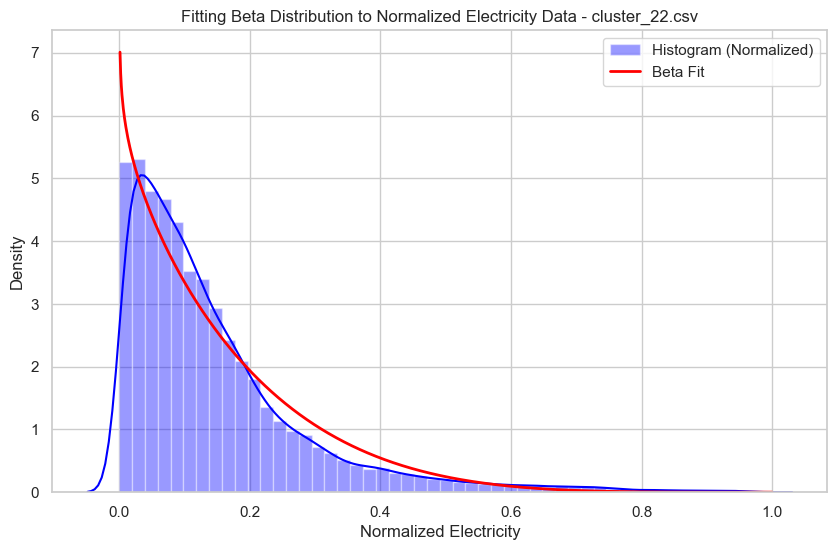

C:\Users\Alicia BASSIERE\AppData\Local\Temp\ipykernel_20120\397288921.py:37: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(electricity_data, kde=True, label='Histogram (Normalized)', color='blue', norm_hist=True)
C:\Users\Alicia BASSIERE\AppData\Local\Temp\ipykernel_20120\397288921.py:38: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r-" (-> color='r'). The keyword argument will take precedence.
  plt.plot(x, pdf_beta, 'r-', lw=2, label='Beta Fit', color='red')


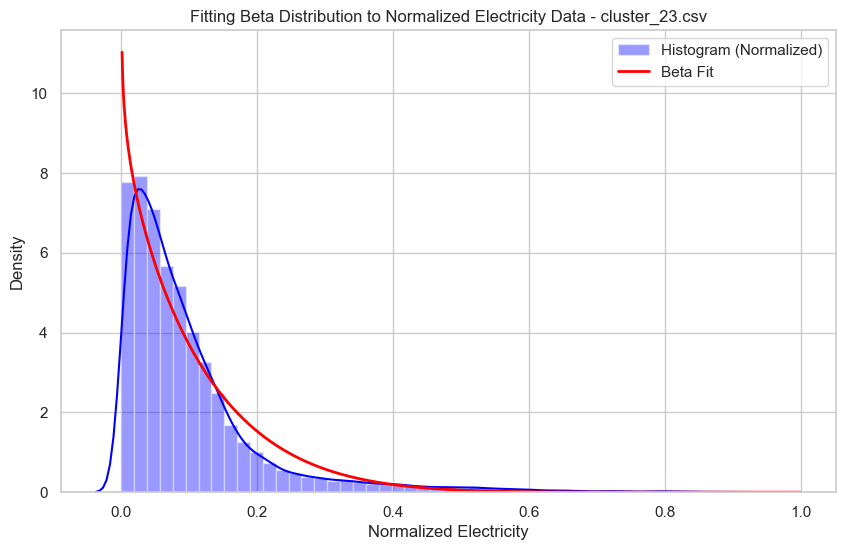

C:\Users\Alicia BASSIERE\AppData\Local\Temp\ipykernel_20120\397288921.py:37: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(electricity_data, kde=True, label='Histogram (Normalized)', color='blue', norm_hist=True)
C:\Users\Alicia BASSIERE\AppData\Local\Temp\ipykernel_20120\397288921.py:38: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r-" (-> color='r'). The keyword argument will take precedence.
  plt.plot(x, pdf_beta, 'r-', lw=2, label='Beta Fit', color='red')


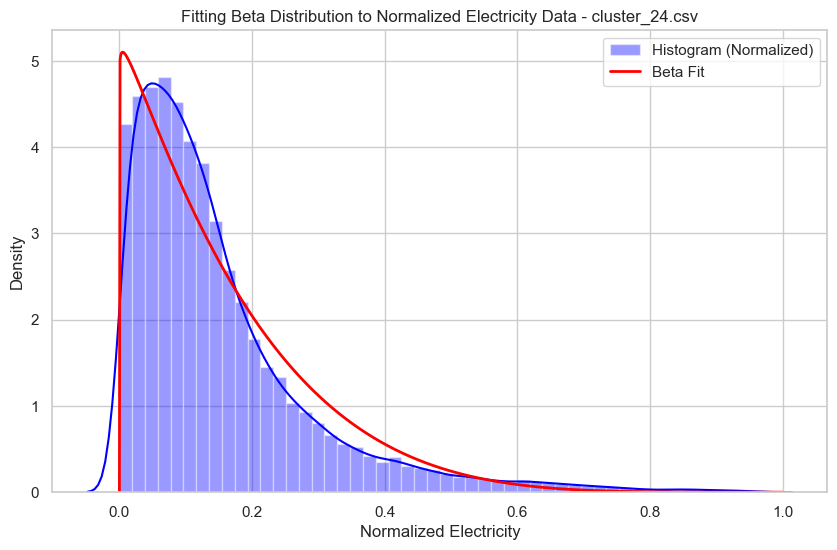

C:\Users\Alicia BASSIERE\AppData\Local\Temp\ipykernel_20120\397288921.py:37: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(electricity_data, kde=True, label='Histogram (Normalized)', color='blue', norm_hist=True)
C:\Users\Alicia BASSIERE\AppData\Local\Temp\ipykernel_20120\397288921.py:38: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r-" (-> color='r'). The keyword argument will take precedence.
  plt.plot(x, pdf_beta, 'r-', lw=2, label='Beta Fit', color='red')


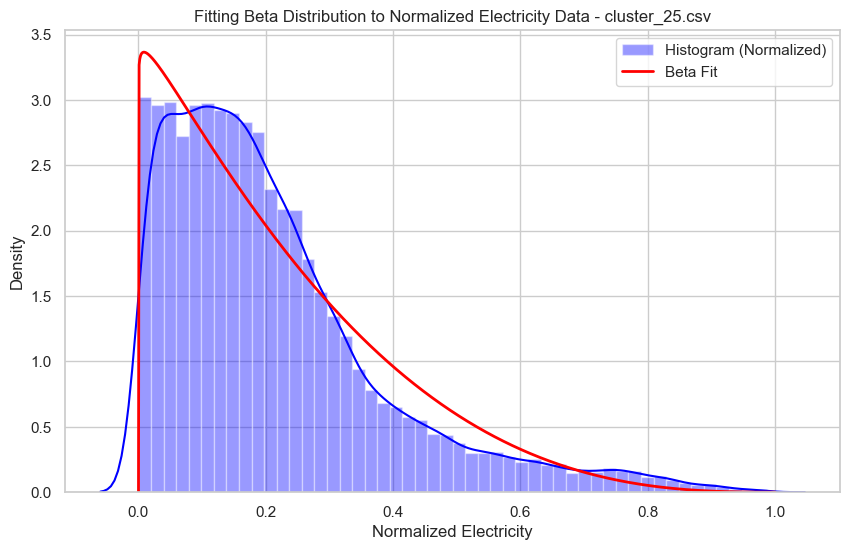

C:\Users\Alicia BASSIERE\AppData\Local\Temp\ipykernel_20120\397288921.py:37: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(electricity_data, kde=True, label='Histogram (Normalized)', color='blue', norm_hist=True)
C:\Users\Alicia BASSIERE\AppData\Local\Temp\ipykernel_20120\397288921.py:38: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r-" (-> color='r'). The keyword argument will take precedence.
  plt.plot(x, pdf_beta, 'r-', lw=2, label='Beta Fit', color='red')


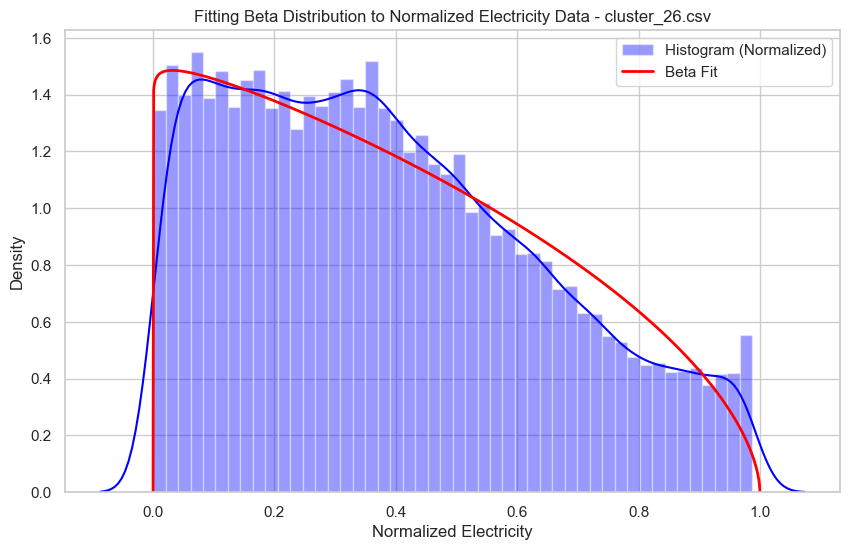

C:\Users\Alicia BASSIERE\AppData\Local\Temp\ipykernel_20120\397288921.py:37: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(electricity_data, kde=True, label='Histogram (Normalized)', color='blue', norm_hist=True)
C:\Users\Alicia BASSIERE\AppData\Local\Temp\ipykernel_20120\397288921.py:38: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r-" (-> color='r'). The keyword argument will take precedence.
  plt.plot(x, pdf_beta, 'r-', lw=2, label='Beta Fit', color='red')


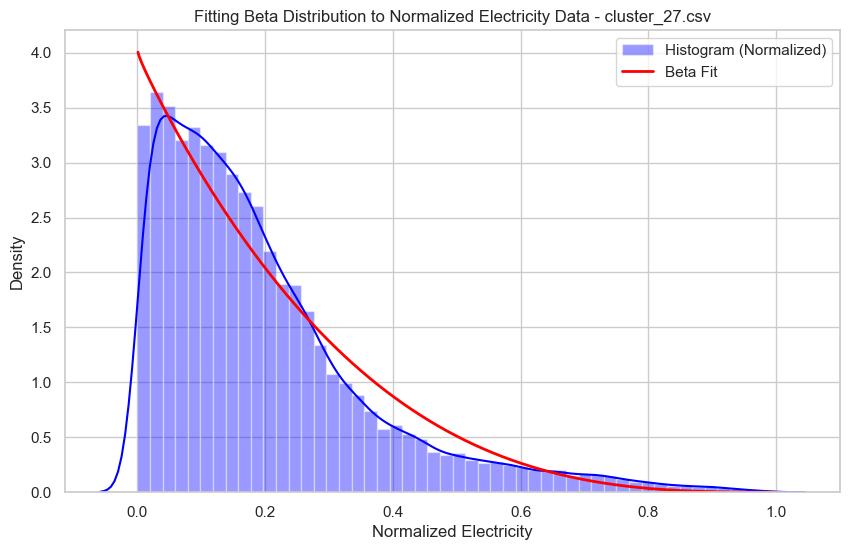

C:\Users\Alicia BASSIERE\AppData\Local\Temp\ipykernel_20120\397288921.py:37: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(electricity_data, kde=True, label='Histogram (Normalized)', color='blue', norm_hist=True)
C:\Users\Alicia BASSIERE\AppData\Local\Temp\ipykernel_20120\397288921.py:38: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r-" (-> color='r'). The keyword argument will take precedence.
  plt.plot(x, pdf_beta, 'r-', lw=2, label='Beta Fit', color='red')


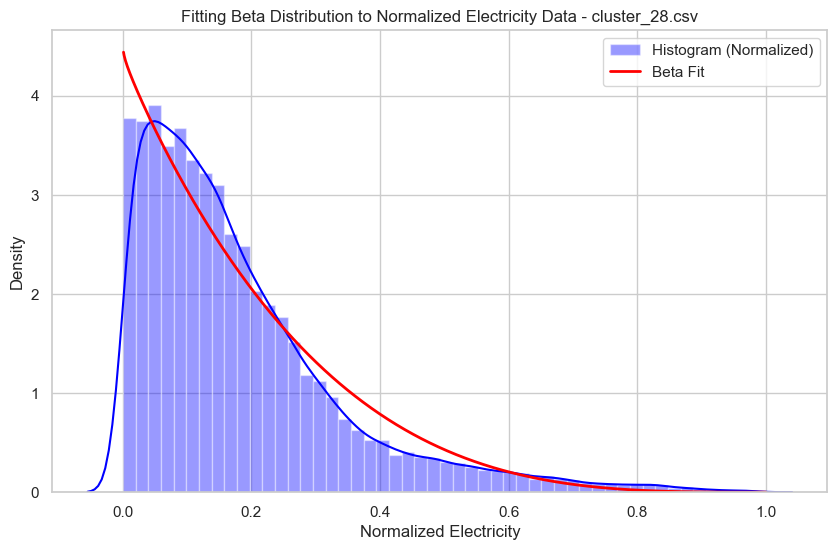

C:\Users\Alicia BASSIERE\AppData\Local\Temp\ipykernel_20120\397288921.py:37: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(electricity_data, kde=True, label='Histogram (Normalized)', color='blue', norm_hist=True)
C:\Users\Alicia BASSIERE\AppData\Local\Temp\ipykernel_20120\397288921.py:38: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r-" (-> color='r'). The keyword argument will take precedence.
  plt.plot(x, pdf_beta, 'r-', lw=2, label='Beta Fit', color='red')


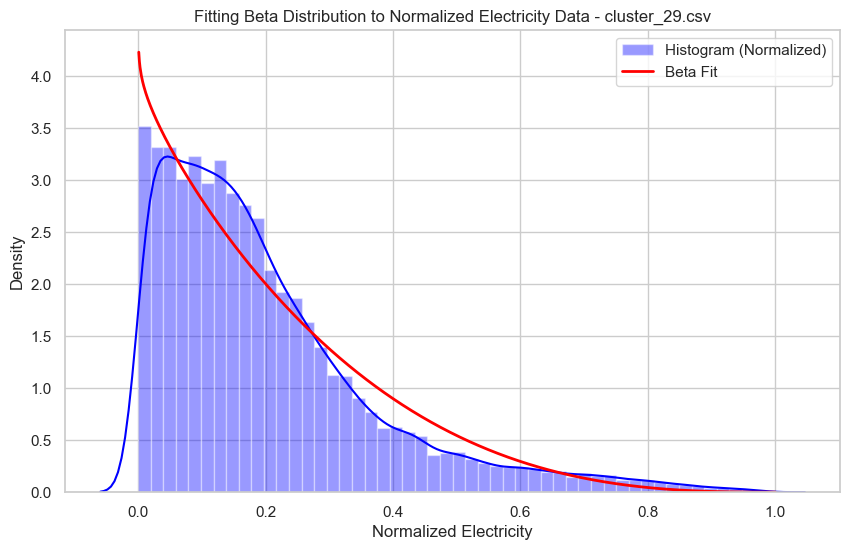

C:\Users\Alicia BASSIERE\AppData\Local\Temp\ipykernel_20120\397288921.py:37: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(electricity_data, kde=True, label='Histogram (Normalized)', color='blue', norm_hist=True)
C:\Users\Alicia BASSIERE\AppData\Local\Temp\ipykernel_20120\397288921.py:38: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r-" (-> color='r'). The keyword argument will take precedence.
  plt.plot(x, pdf_beta, 'r-', lw=2, label='Beta Fit', color='red')


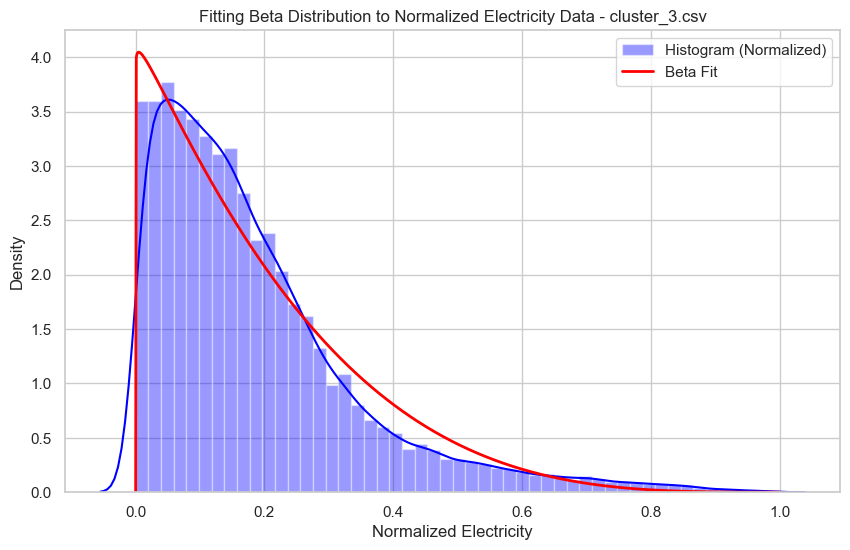

C:\Users\Alicia BASSIERE\AppData\Local\Temp\ipykernel_20120\397288921.py:37: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(electricity_data, kde=True, label='Histogram (Normalized)', color='blue', norm_hist=True)
C:\Users\Alicia BASSIERE\AppData\Local\Temp\ipykernel_20120\397288921.py:38: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r-" (-> color='r'). The keyword argument will take precedence.
  plt.plot(x, pdf_beta, 'r-', lw=2, label='Beta Fit', color='red')


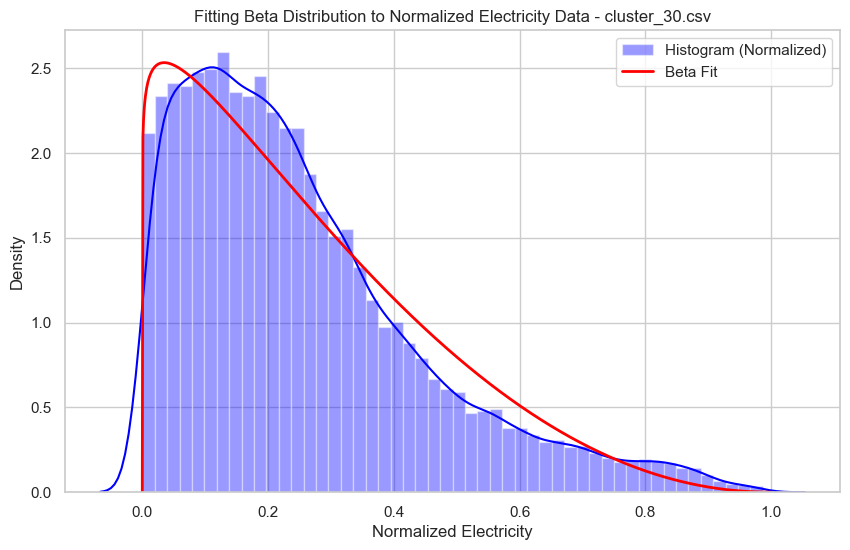

C:\Users\Alicia BASSIERE\AppData\Local\Temp\ipykernel_20120\397288921.py:37: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(electricity_data, kde=True, label='Histogram (Normalized)', color='blue', norm_hist=True)
C:\Users\Alicia BASSIERE\AppData\Local\Temp\ipykernel_20120\397288921.py:38: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r-" (-> color='r'). The keyword argument will take precedence.
  plt.plot(x, pdf_beta, 'r-', lw=2, label='Beta Fit', color='red')


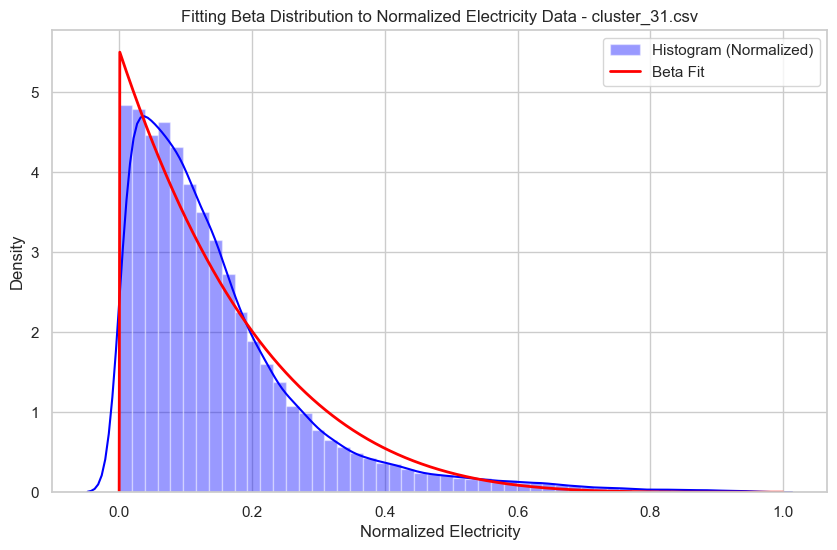

C:\Users\Alicia BASSIERE\AppData\Local\Temp\ipykernel_20120\397288921.py:37: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(electricity_data, kde=True, label='Histogram (Normalized)', color='blue', norm_hist=True)
C:\Users\Alicia BASSIERE\AppData\Local\Temp\ipykernel_20120\397288921.py:38: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r-" (-> color='r'). The keyword argument will take precedence.
  plt.plot(x, pdf_beta, 'r-', lw=2, label='Beta Fit', color='red')


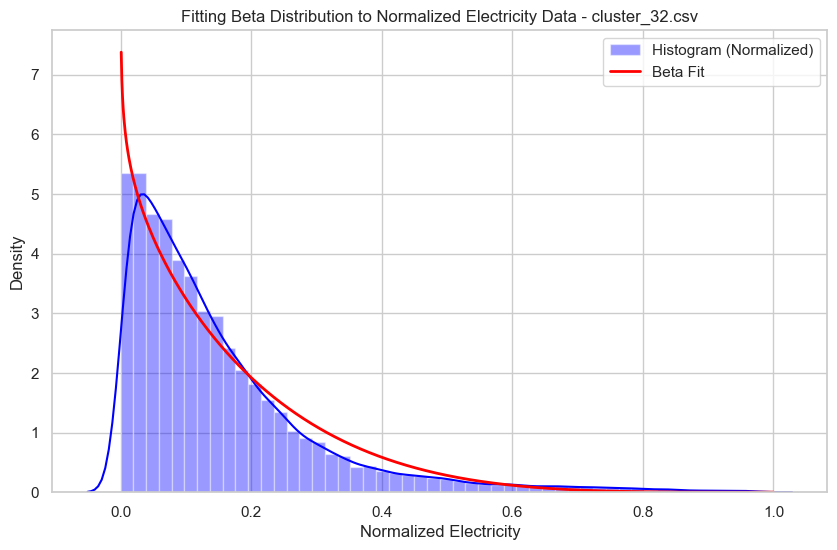

C:\Users\Alicia BASSIERE\AppData\Local\Temp\ipykernel_20120\397288921.py:37: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(electricity_data, kde=True, label='Histogram (Normalized)', color='blue', norm_hist=True)
C:\Users\Alicia BASSIERE\AppData\Local\Temp\ipykernel_20120\397288921.py:38: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r-" (-> color='r'). The keyword argument will take precedence.
  plt.plot(x, pdf_beta, 'r-', lw=2, label='Beta Fit', color='red')


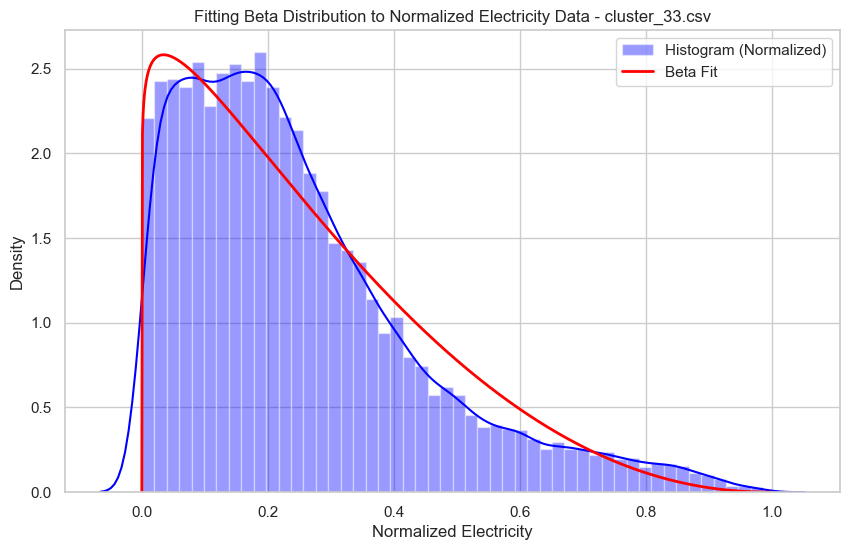

C:\Users\Alicia BASSIERE\AppData\Local\Temp\ipykernel_20120\397288921.py:37: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(electricity_data, kde=True, label='Histogram (Normalized)', color='blue', norm_hist=True)
C:\Users\Alicia BASSIERE\AppData\Local\Temp\ipykernel_20120\397288921.py:38: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r-" (-> color='r'). The keyword argument will take precedence.
  plt.plot(x, pdf_beta, 'r-', lw=2, label='Beta Fit', color='red')


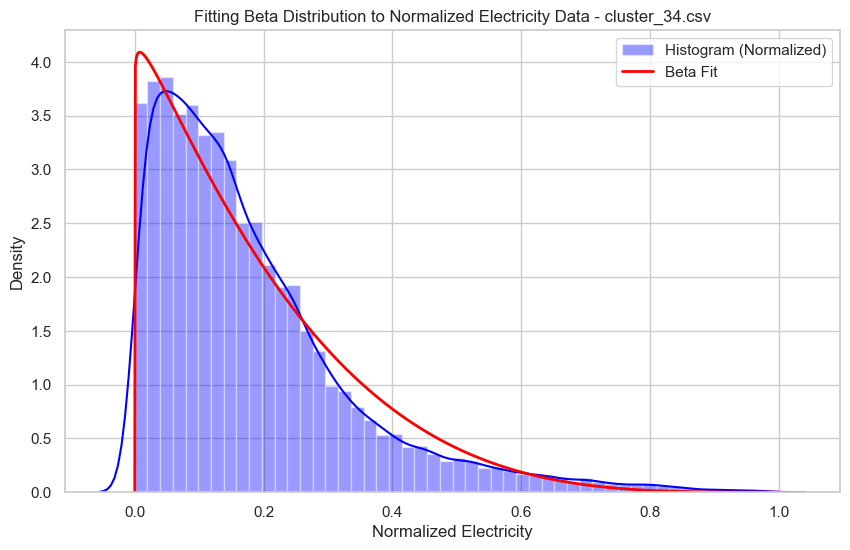

C:\Users\Alicia BASSIERE\AppData\Local\Temp\ipykernel_20120\397288921.py:37: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(electricity_data, kde=True, label='Histogram (Normalized)', color='blue', norm_hist=True)
C:\Users\Alicia BASSIERE\AppData\Local\Temp\ipykernel_20120\397288921.py:38: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r-" (-> color='r'). The keyword argument will take precedence.
  plt.plot(x, pdf_beta, 'r-', lw=2, label='Beta Fit', color='red')


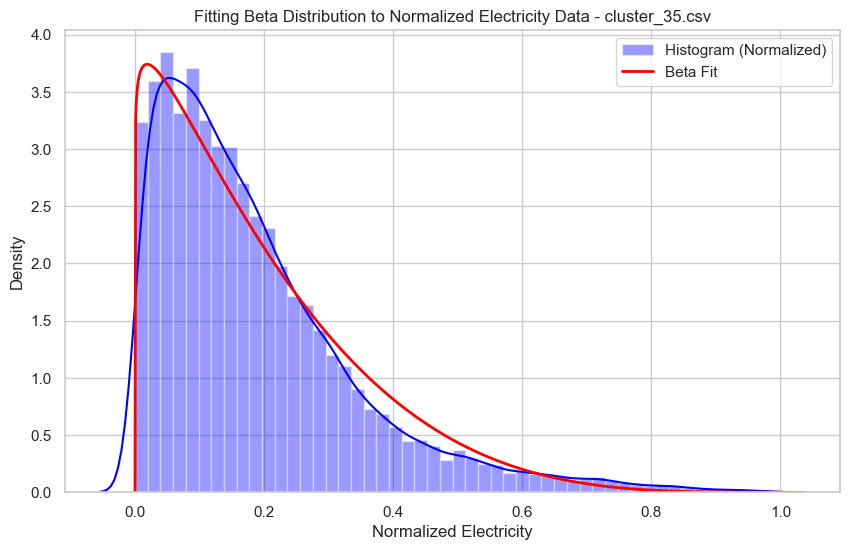

C:\Users\Alicia BASSIERE\AppData\Local\Temp\ipykernel_20120\397288921.py:37: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(electricity_data, kde=True, label='Histogram (Normalized)', color='blue', norm_hist=True)
C:\Users\Alicia BASSIERE\AppData\Local\Temp\ipykernel_20120\397288921.py:38: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r-" (-> color='r'). The keyword argument will take precedence.
  plt.plot(x, pdf_beta, 'r-', lw=2, label='Beta Fit', color='red')


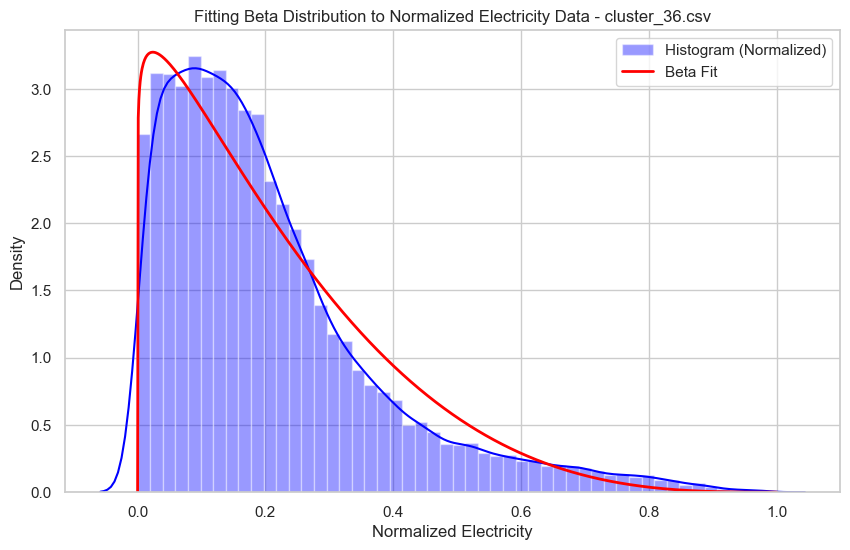

C:\Users\Alicia BASSIERE\AppData\Local\Temp\ipykernel_20120\397288921.py:37: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(electricity_data, kde=True, label='Histogram (Normalized)', color='blue', norm_hist=True)
C:\Users\Alicia BASSIERE\AppData\Local\Temp\ipykernel_20120\397288921.py:38: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r-" (-> color='r'). The keyword argument will take precedence.
  plt.plot(x, pdf_beta, 'r-', lw=2, label='Beta Fit', color='red')


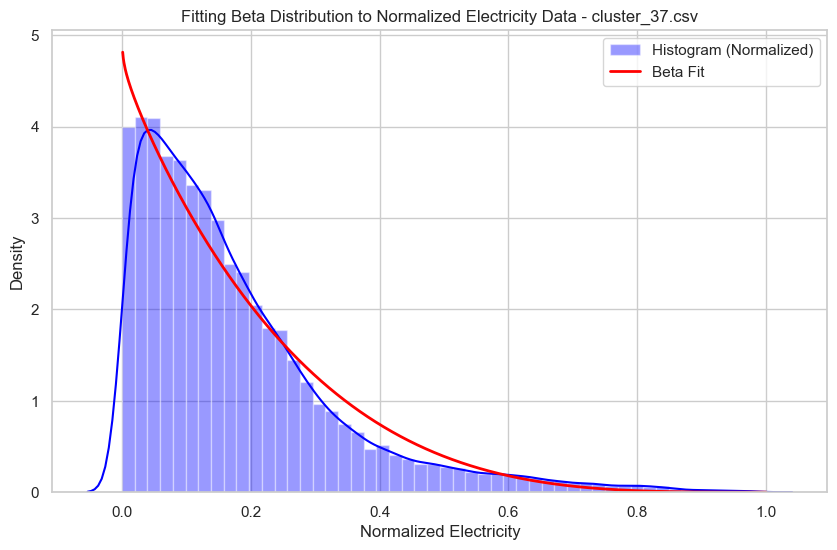

C:\Users\Alicia BASSIERE\AppData\Local\Temp\ipykernel_20120\397288921.py:37: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(electricity_data, kde=True, label='Histogram (Normalized)', color='blue', norm_hist=True)
C:\Users\Alicia BASSIERE\AppData\Local\Temp\ipykernel_20120\397288921.py:38: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r-" (-> color='r'). The keyword argument will take precedence.
  plt.plot(x, pdf_beta, 'r-', lw=2, label='Beta Fit', color='red')


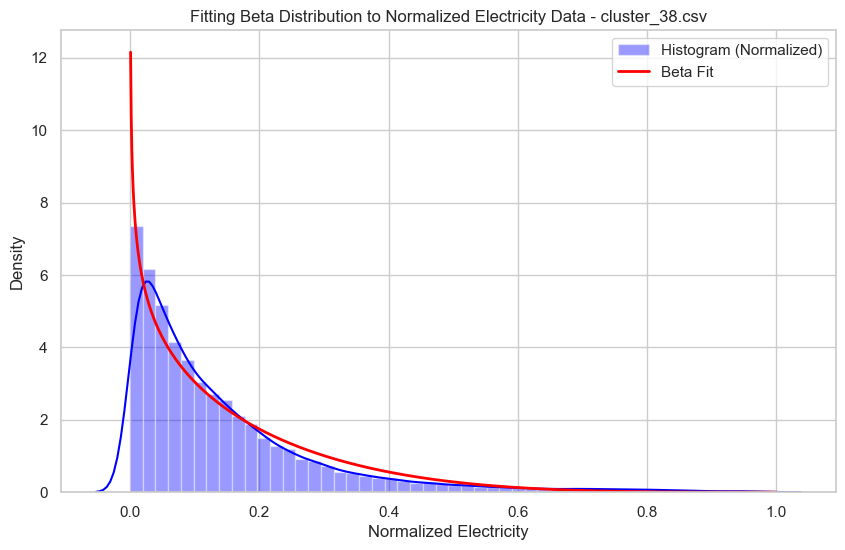

C:\Users\Alicia BASSIERE\AppData\Local\Temp\ipykernel_20120\397288921.py:37: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(electricity_data, kde=True, label='Histogram (Normalized)', color='blue', norm_hist=True)
C:\Users\Alicia BASSIERE\AppData\Local\Temp\ipykernel_20120\397288921.py:38: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r-" (-> color='r'). The keyword argument will take precedence.
  plt.plot(x, pdf_beta, 'r-', lw=2, label='Beta Fit', color='red')


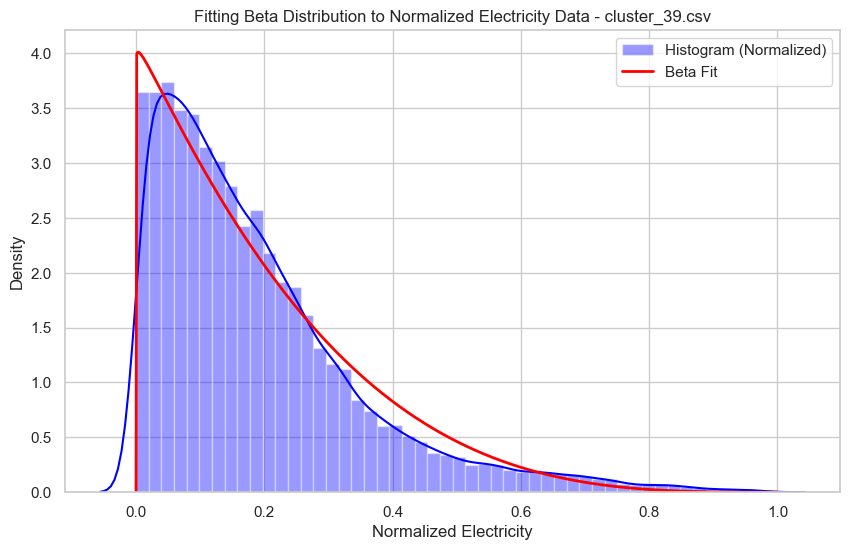

C:\Users\Alicia BASSIERE\AppData\Local\Temp\ipykernel_20120\397288921.py:37: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(electricity_data, kde=True, label='Histogram (Normalized)', color='blue', norm_hist=True)
C:\Users\Alicia BASSIERE\AppData\Local\Temp\ipykernel_20120\397288921.py:38: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r-" (-> color='r'). The keyword argument will take precedence.
  plt.plot(x, pdf_beta, 'r-', lw=2, label='Beta Fit', color='red')


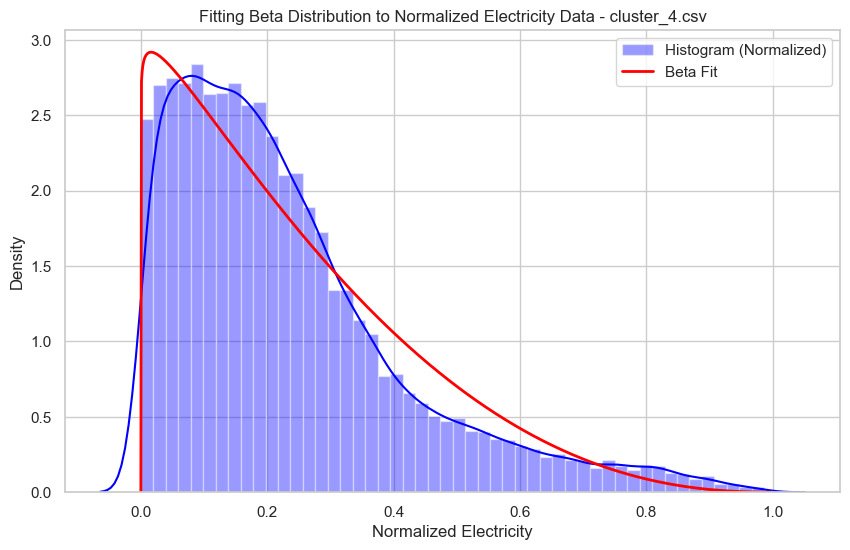

C:\Users\Alicia BASSIERE\AppData\Local\Temp\ipykernel_20120\397288921.py:37: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(electricity_data, kde=True, label='Histogram (Normalized)', color='blue', norm_hist=True)
C:\Users\Alicia BASSIERE\AppData\Local\Temp\ipykernel_20120\397288921.py:38: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r-" (-> color='r'). The keyword argument will take precedence.
  plt.plot(x, pdf_beta, 'r-', lw=2, label='Beta Fit', color='red')


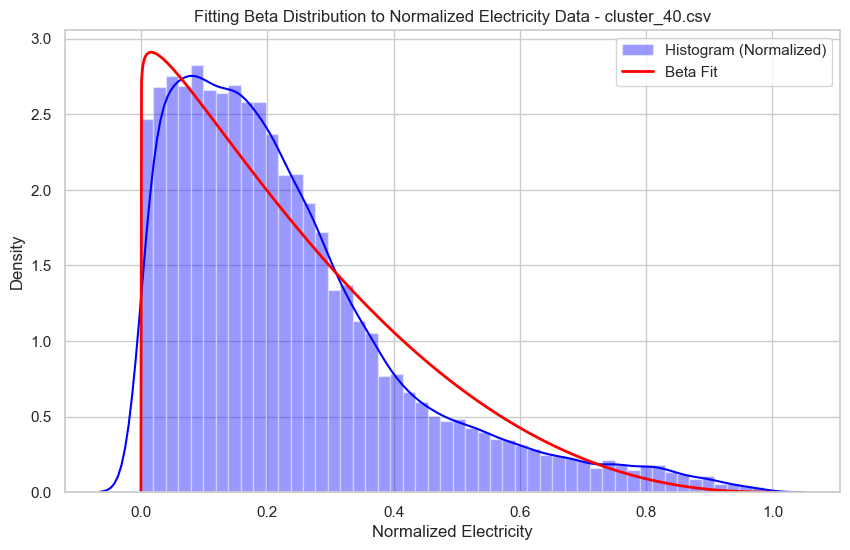

C:\Users\Alicia BASSIERE\AppData\Local\Temp\ipykernel_20120\397288921.py:37: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(electricity_data, kde=True, label='Histogram (Normalized)', color='blue', norm_hist=True)
C:\Users\Alicia BASSIERE\AppData\Local\Temp\ipykernel_20120\397288921.py:38: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r-" (-> color='r'). The keyword argument will take precedence.
  plt.plot(x, pdf_beta, 'r-', lw=2, label='Beta Fit', color='red')


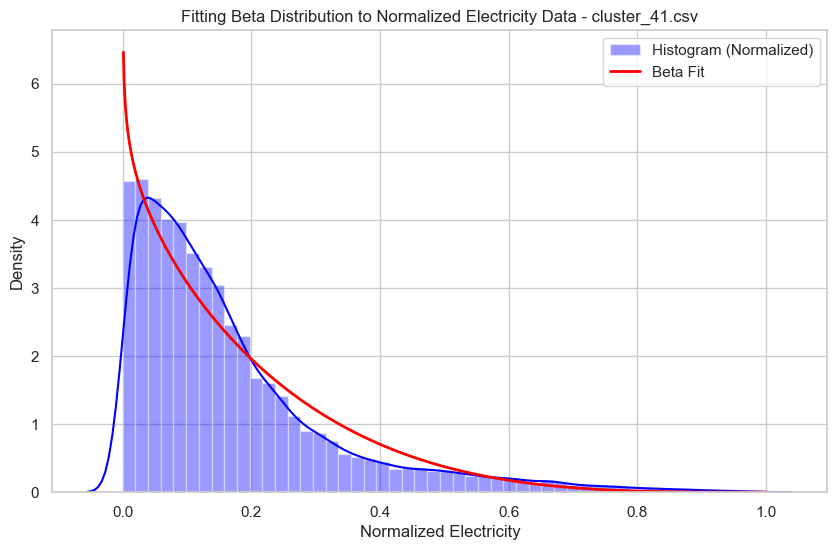

C:\Users\Alicia BASSIERE\AppData\Local\Temp\ipykernel_20120\397288921.py:37: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(electricity_data, kde=True, label='Histogram (Normalized)', color='blue', norm_hist=True)
C:\Users\Alicia BASSIERE\AppData\Local\Temp\ipykernel_20120\397288921.py:38: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r-" (-> color='r'). The keyword argument will take precedence.
  plt.plot(x, pdf_beta, 'r-', lw=2, label='Beta Fit', color='red')


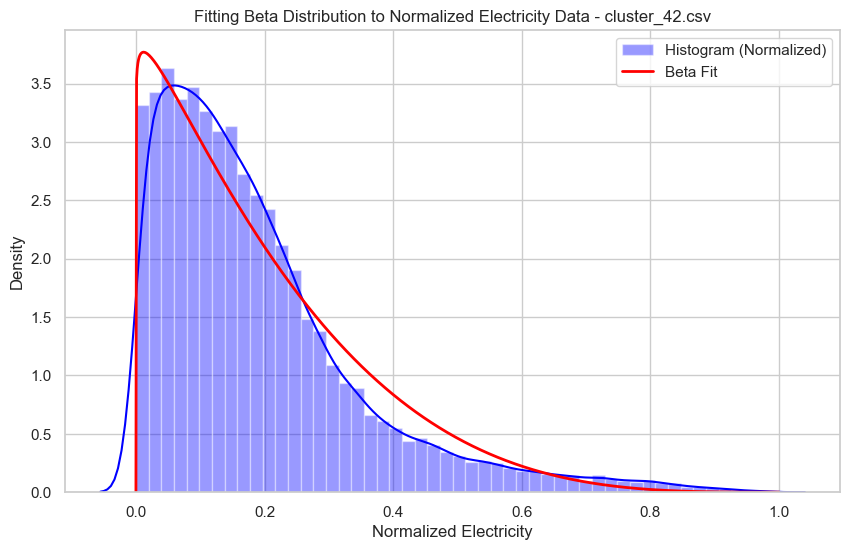

C:\Users\Alicia BASSIERE\AppData\Local\Temp\ipykernel_20120\397288921.py:37: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(electricity_data, kde=True, label='Histogram (Normalized)', color='blue', norm_hist=True)
C:\Users\Alicia BASSIERE\AppData\Local\Temp\ipykernel_20120\397288921.py:38: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r-" (-> color='r'). The keyword argument will take precedence.
  plt.plot(x, pdf_beta, 'r-', lw=2, label='Beta Fit', color='red')


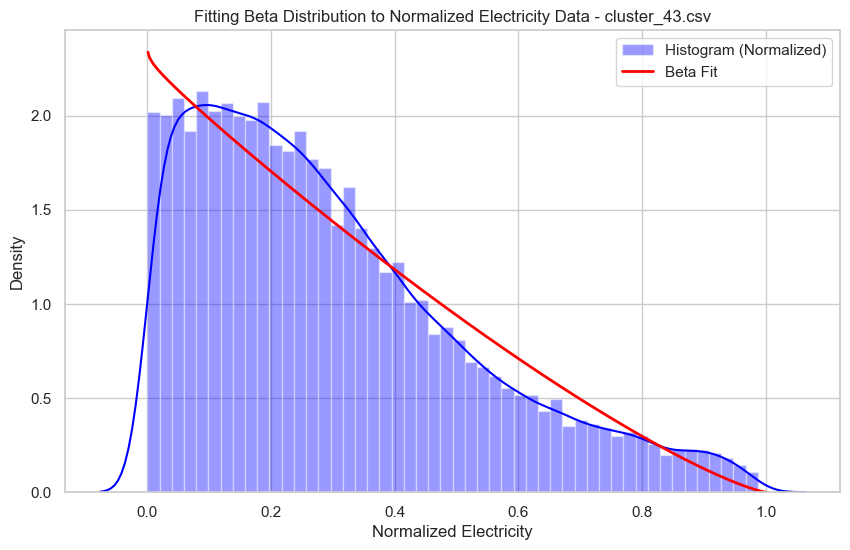

C:\Users\Alicia BASSIERE\AppData\Local\Temp\ipykernel_20120\397288921.py:37: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(electricity_data, kde=True, label='Histogram (Normalized)', color='blue', norm_hist=True)
C:\Users\Alicia BASSIERE\AppData\Local\Temp\ipykernel_20120\397288921.py:38: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r-" (-> color='r'). The keyword argument will take precedence.
  plt.plot(x, pdf_beta, 'r-', lw=2, label='Beta Fit', color='red')


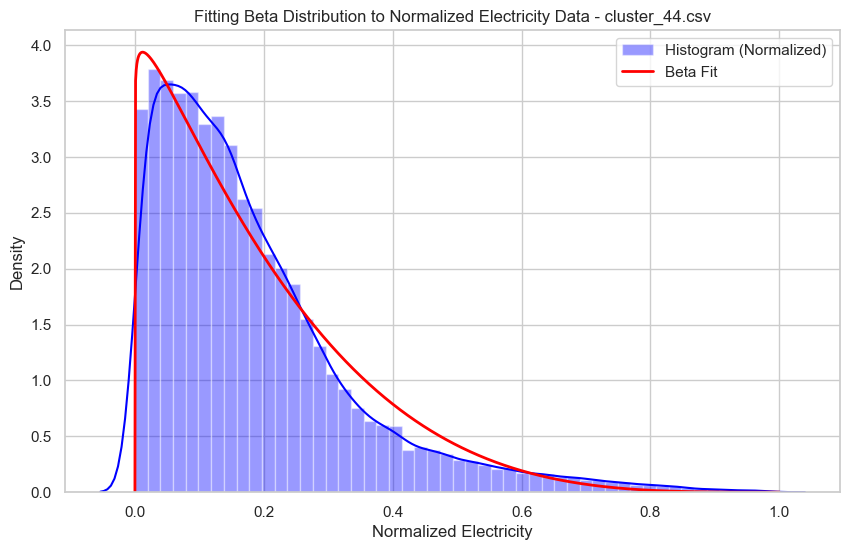

C:\Users\Alicia BASSIERE\AppData\Local\Temp\ipykernel_20120\397288921.py:37: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(electricity_data, kde=True, label='Histogram (Normalized)', color='blue', norm_hist=True)
C:\Users\Alicia BASSIERE\AppData\Local\Temp\ipykernel_20120\397288921.py:38: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r-" (-> color='r'). The keyword argument will take precedence.
  plt.plot(x, pdf_beta, 'r-', lw=2, label='Beta Fit', color='red')


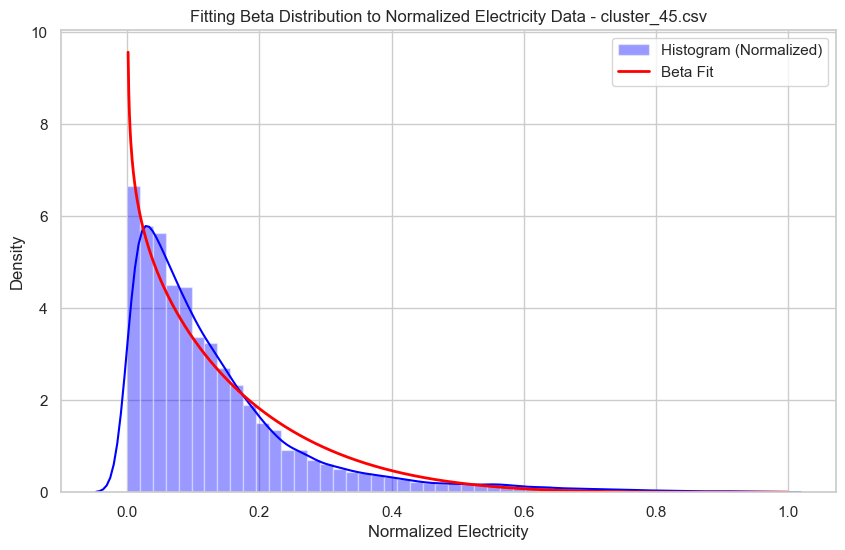

C:\Users\Alicia BASSIERE\AppData\Local\Temp\ipykernel_20120\397288921.py:37: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(electricity_data, kde=True, label='Histogram (Normalized)', color='blue', norm_hist=True)
C:\Users\Alicia BASSIERE\AppData\Local\Temp\ipykernel_20120\397288921.py:38: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r-" (-> color='r'). The keyword argument will take precedence.
  plt.plot(x, pdf_beta, 'r-', lw=2, label='Beta Fit', color='red')


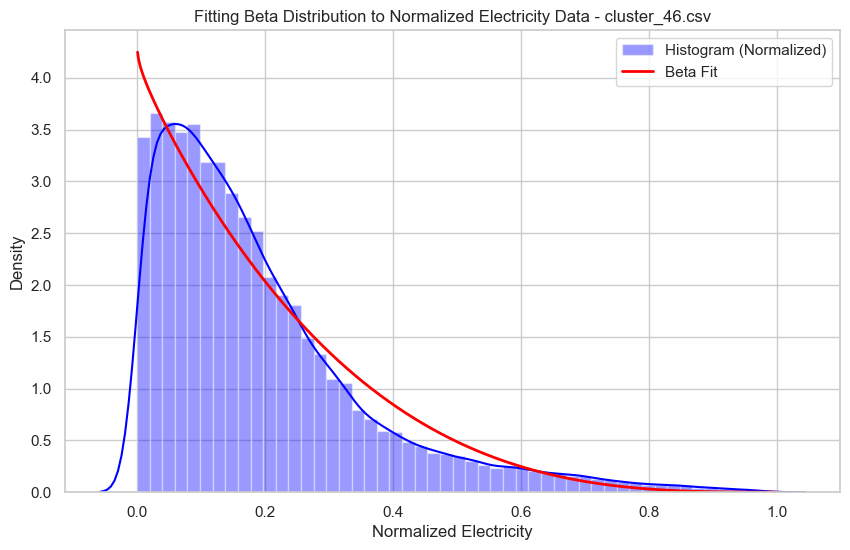

C:\Users\Alicia BASSIERE\AppData\Local\Temp\ipykernel_20120\397288921.py:37: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(electricity_data, kde=True, label='Histogram (Normalized)', color='blue', norm_hist=True)
C:\Users\Alicia BASSIERE\AppData\Local\Temp\ipykernel_20120\397288921.py:38: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r-" (-> color='r'). The keyword argument will take precedence.
  plt.plot(x, pdf_beta, 'r-', lw=2, label='Beta Fit', color='red')


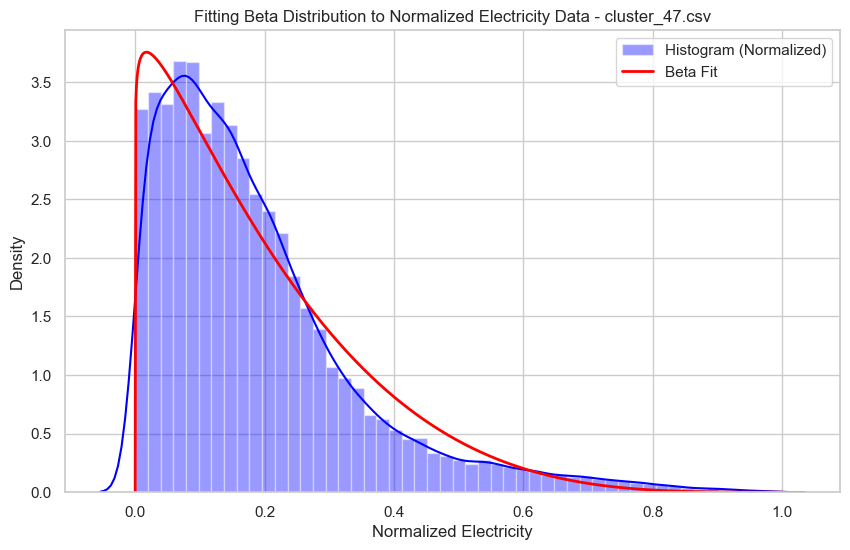

C:\Users\Alicia BASSIERE\AppData\Local\Temp\ipykernel_20120\397288921.py:37: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(electricity_data, kde=True, label='Histogram (Normalized)', color='blue', norm_hist=True)
C:\Users\Alicia BASSIERE\AppData\Local\Temp\ipykernel_20120\397288921.py:38: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r-" (-> color='r'). The keyword argument will take precedence.
  plt.plot(x, pdf_beta, 'r-', lw=2, label='Beta Fit', color='red')


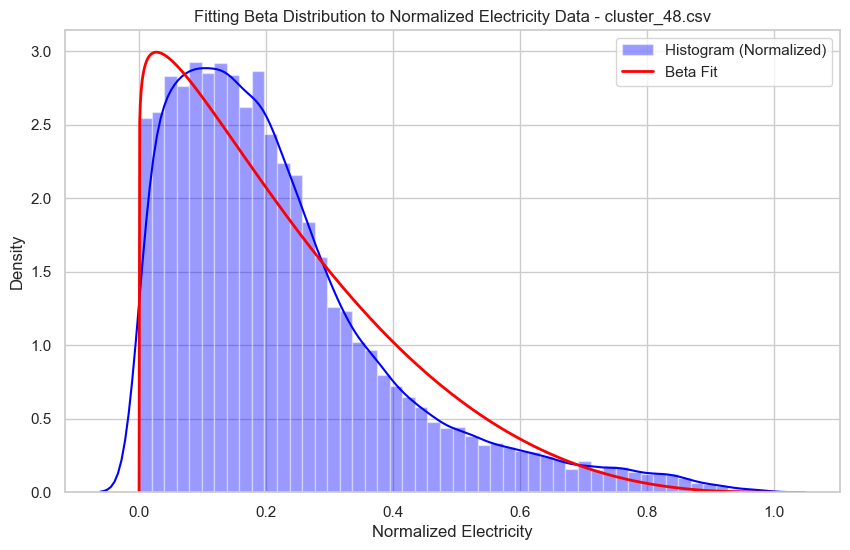

C:\Users\Alicia BASSIERE\AppData\Local\Temp\ipykernel_20120\397288921.py:37: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(electricity_data, kde=True, label='Histogram (Normalized)', color='blue', norm_hist=True)
C:\Users\Alicia BASSIERE\AppData\Local\Temp\ipykernel_20120\397288921.py:38: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r-" (-> color='r'). The keyword argument will take precedence.
  plt.plot(x, pdf_beta, 'r-', lw=2, label='Beta Fit', color='red')


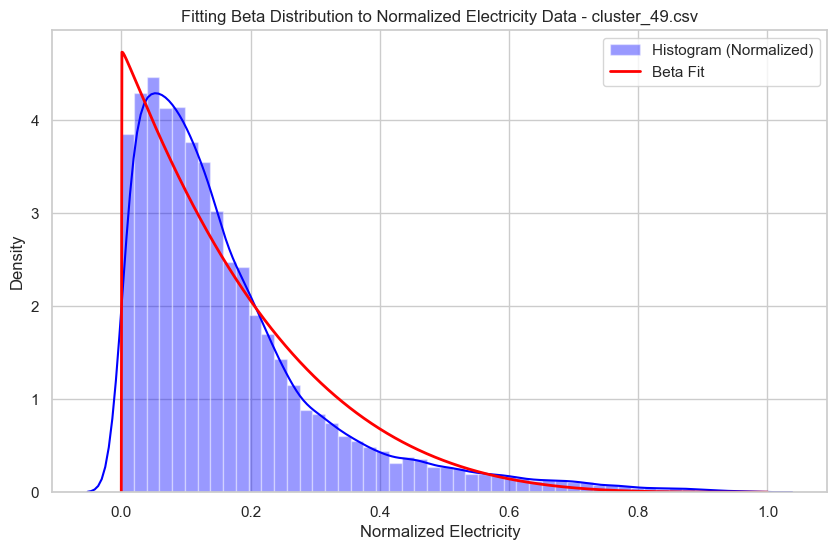

C:\Users\Alicia BASSIERE\AppData\Local\Temp\ipykernel_20120\397288921.py:37: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(electricity_data, kde=True, label='Histogram (Normalized)', color='blue', norm_hist=True)
C:\Users\Alicia BASSIERE\AppData\Local\Temp\ipykernel_20120\397288921.py:38: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r-" (-> color='r'). The keyword argument will take precedence.
  plt.plot(x, pdf_beta, 'r-', lw=2, label='Beta Fit', color='red')


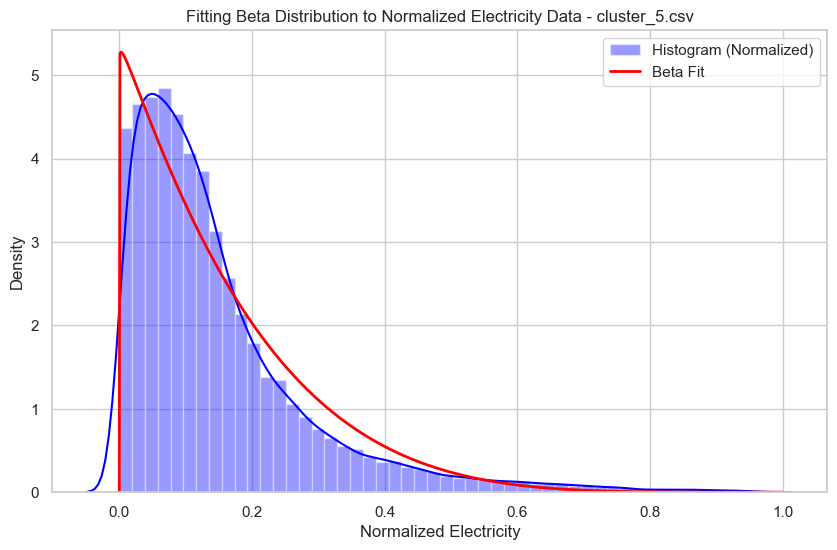

C:\Users\Alicia BASSIERE\AppData\Local\Temp\ipykernel_20120\397288921.py:37: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(electricity_data, kde=True, label='Histogram (Normalized)', color='blue', norm_hist=True)
C:\Users\Alicia BASSIERE\AppData\Local\Temp\ipykernel_20120\397288921.py:38: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r-" (-> color='r'). The keyword argument will take precedence.
  plt.plot(x, pdf_beta, 'r-', lw=2, label='Beta Fit', color='red')


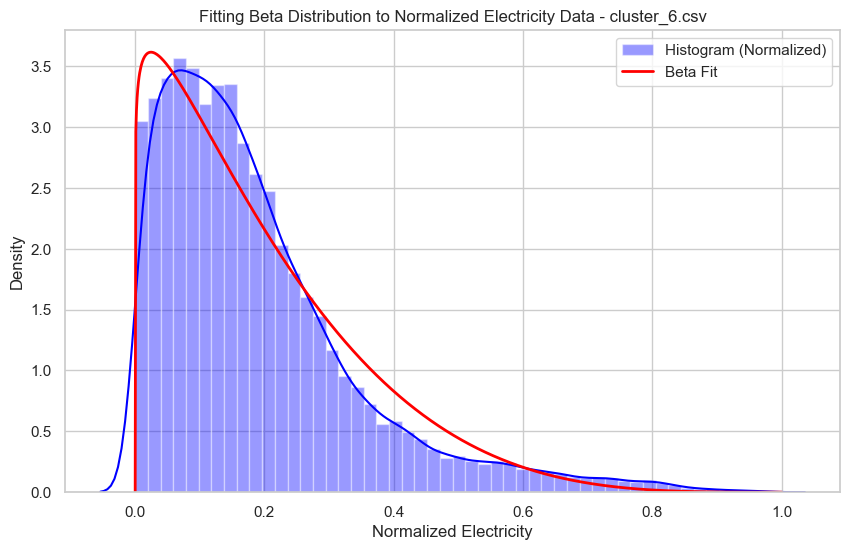

C:\Users\Alicia BASSIERE\AppData\Local\Temp\ipykernel_20120\397288921.py:37: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(electricity_data, kde=True, label='Histogram (Normalized)', color='blue', norm_hist=True)
C:\Users\Alicia BASSIERE\AppData\Local\Temp\ipykernel_20120\397288921.py:38: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r-" (-> color='r'). The keyword argument will take precedence.
  plt.plot(x, pdf_beta, 'r-', lw=2, label='Beta Fit', color='red')


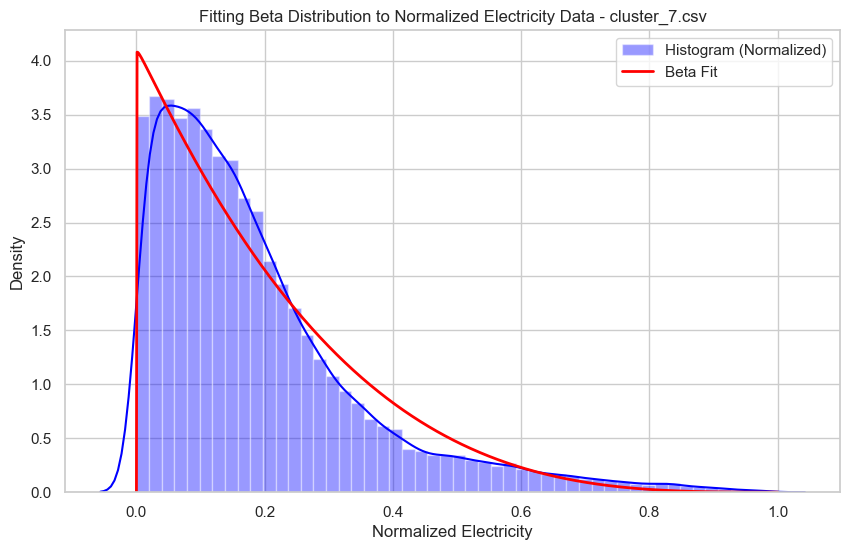

C:\Users\Alicia BASSIERE\AppData\Local\Temp\ipykernel_20120\397288921.py:37: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(electricity_data, kde=True, label='Histogram (Normalized)', color='blue', norm_hist=True)
C:\Users\Alicia BASSIERE\AppData\Local\Temp\ipykernel_20120\397288921.py:38: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r-" (-> color='r'). The keyword argument will take precedence.
  plt.plot(x, pdf_beta, 'r-', lw=2, label='Beta Fit', color='red')


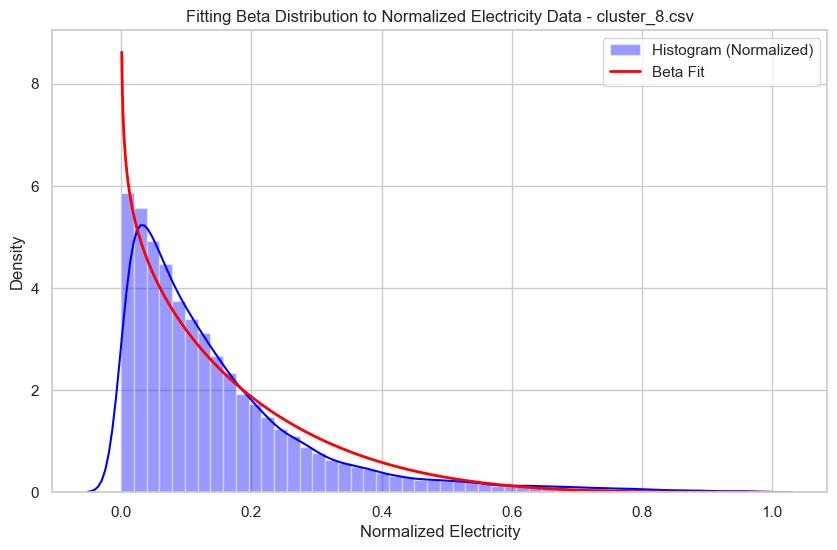

C:\Users\Alicia BASSIERE\AppData\Local\Temp\ipykernel_20120\397288921.py:37: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(electricity_data, kde=True, label='Histogram (Normalized)', color='blue', norm_hist=True)
C:\Users\Alicia BASSIERE\AppData\Local\Temp\ipykernel_20120\397288921.py:38: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r-" (-> color='r'). The keyword argument will take precedence.
  plt.plot(x, pdf_beta, 'r-', lw=2, label='Beta Fit', color='red')


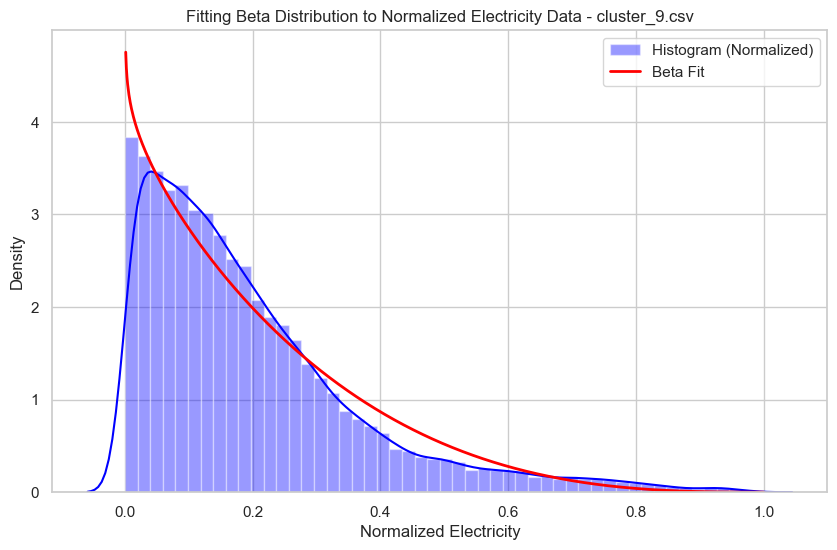

           Cluster     Alpha      Beta
0    cluster_0.csv  1.033190  2.781277
1    cluster_1.csv  1.069259  4.524215
2   cluster_10.csv  0.995267  3.884391
3   cluster_11.csv  1.080500  3.853150
4   cluster_12.csv  1.025559  4.467480
5   cluster_13.csv  0.938954  4.514133
6   cluster_14.csv  1.003671  3.867423
7   cluster_15.csv  0.947668  3.619710
8   cluster_16.csv  0.989672  2.067939
9   cluster_17.csv  1.050303  4.483317
10  cluster_18.csv  1.044221  1.488467
11  cluster_19.csv  1.099296  3.771176
12   cluster_2.csv  0.997704  4.802912
13  cluster_20.csv  0.888241  4.929568
14  cluster_21.csv  1.093253  4.553772
15  cluster_22.csv  0.935654  5.259645
16  cluster_23.csv  0.921667  8.040651
17  cluster_24.csv  1.022340  5.571746
18  cluster_25.csv  1.023102  3.671719
19  cluster_26.csv  1.018826  1.575440
20  cluster_27.csv  0.996194  3.943543
21  cluster_28.csv  0.993303  4.314311
22  cluster_29.csv  0.972965  3.719701
23   cluster_3.csv  1.015749  4.324925
24  cluster_30.csv  1.074

In [71]:

# Initialize an empty DataFrame to store results
results_df = pd.DataFrame(columns=['Cluster', 'Alpha', 'Beta'])

# Iterate through files in the directory
for filename in os.listdir(path):
    if filename.startswith("cluster") and filename.endswith(".csv"):
        # Read the CSV file
        cluster_df = pd.read_csv(os.path.join(path, filename))

        # Extract the "electricity" column
        electricity_data = cluster_df['electricity']


        # Reshape the data for fitting
        s = electricity_data.mean() # squeezer
        electricity_data = (electricity_data*(len(electricity_data)-1)+s)/len(electricity_data)
        # electricity_data = electricity_data[(electricity_data > 0) & (electricity_data < 1)]

        # Provide initial parameter guesses
        initial_alpha = 1
        initial_beta = 1

        # Fit a Beta distribution to the normalized data with initial guesses
        alpha, beta_params, loc, scale = beta.fit(electricity_data, floc=0, fscale=1, loc=initial_alpha, scale=initial_beta)

        # Create a DataFrame with the current result
        result_df = pd.DataFrame({'Cluster': [filename], 'Alpha': [alpha], 'Beta': [beta_params]})

        # Concatenate the current result to the main results DataFrame
        results_df = pd.concat([results_df, result_df], ignore_index=True)

        # Generate values for the Beta distribution and plot
        x = np.linspace(0, 1, 1000)
        pdf_beta = beta.pdf(x, alpha, beta_params, loc, scale)

        plt.figure(figsize=(10, 6))
        sns.distplot(electricity_data, kde=True, label='Histogram (Normalized)', color='blue', norm_hist=True)
        plt.plot(x, pdf_beta, 'r-', lw=2, label='Beta Fit', color='red')
        plt.title(f'Fitting Beta Distribution to Normalized Electricity Data - {filename}')
        plt.xlabel('Normalized Electricity')
        plt.ylabel('Density')
        plt.legend()
        plt.show()

# Print the DataFrame with results
print(results_df)
